<a href="https://colab.research.google.com/github/serjisa/fastglmpca/blob/main/examples/scRNA-Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing of PBMC dataset with `fastglmpca`

In [1]:
import scanpy as sc
import fastglmpca

Here we're downloading two datasets: raw (`sc.datasets.pbmc3k()`) — to take count matrix from it — and processed (`sc.datasets.pbmc3k_processed()`) — to keep cells' annotation for visualization purposes.

In [2]:
adata_processed = sc.datasets.pbmc3k_processed()

adata = sc.datasets.pbmc3k()[adata_processed.obs_names]
adata.obs["cell_type"] = adata_processed.obs["louvain"]

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

/var/folders/7g/4dznsn2d1dj0t1tdx3s1mj1w0000gn/T/ipykernel_20654/465559898.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cell_type"] = adata_processed.obs["louvain"]


Now it's time for the most computationally expensive procedure — GLM-PCA calculation. It's highly recommended to use Google Colab for it.

In [3]:
adata.obsm["X_glmpca"] = fastglmpca.poisson(adata.X, n_pcs=20, )

/Users/sisaev/Tools/miniconda3/lib/python3.12/site-packages/fastglmpca/utils.py:349: UserWarning: Sparse tensor conversion to device not supported. Using CPU instead. If you want to use MPS / CUDA, please convert the input matrix to dense format.
  warnings.warn("Sparse tensor conversion to device not supported. Using CPU instead. If you want to use MPS / CUDA, please convert the input matrix to dense format.")
GLM-PCA Iterations:   0%|                                        | 0/1000 [00:25<?, ?it/s]


Convergence reached after 1 iterations.


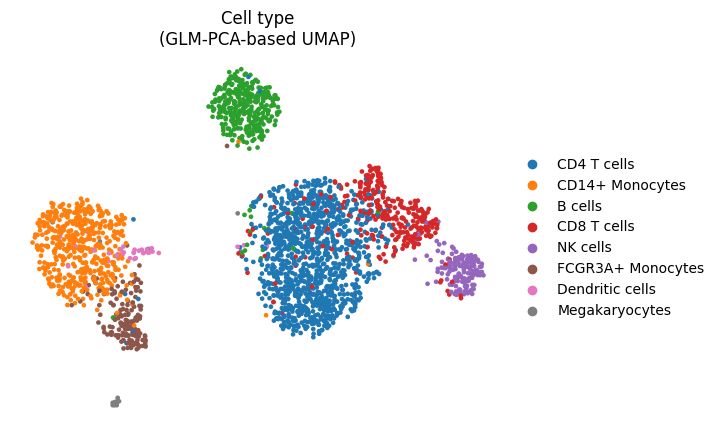

In [4]:
sc.pp.neighbors(adata, use_rep="X_glmpca")
sc.tl.umap(adata)

sc.pl.umap(adata, color="cell_type", frameon=False,
           title="Cell type\n(GLM-PCA-based UMAP)")